In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [187]:
def truncate(n, decimals=0):
    multiplier = 10 ** decimals
    return int(n * multiplier) / multiplier

In [188]:
df=pd.read_csv("profile-400.xv", skiprows=(16), delimiter="\t",names=["x","y"])

Verifica as primeiras linhas, se importou direito

In [189]:
print (df.head(2))

          x         y
0  0.946225  0.000000
1  0.957164 -2.125722


In [190]:
print (df.loc[5:,["x","y"]])

            x         y
5    1.000918 -1.263096
6    1.011857  0.718543
7    1.022796 -0.948802
8    1.033734 -0.595082
9    1.044673 -0.136718
..        ...       ...
395  5.266989  0.557581
396  5.277928  0.067899
397  5.288867  0.330139
398  5.299805  2.814626
399  5.310744 -1.980620

[395 rows x 2 columns]


Tira os pontos das pontas:

In [191]:
df["x"]=df.loc[9:390,"x"]

Inverte o sinal de x (se quiser):

In [192]:
df["x"]=df["x"] * 1

Coloca o início da simulação em ZERO:

In [193]:
df["y"]=df["y"] +0

Imprime o máximo e o mínimo da curva

In [194]:
#perfil200.min()
y_min=truncate(df["y"].min(),2)
y_max=truncate(df["y"].max(),2)
delta=truncate((y_max - y_min),2)
print('min:',y_min, 'max:',y_max,'delta:',delta)

min: -5.4 max: 2.81 delta: 8.21


gera o gráfico

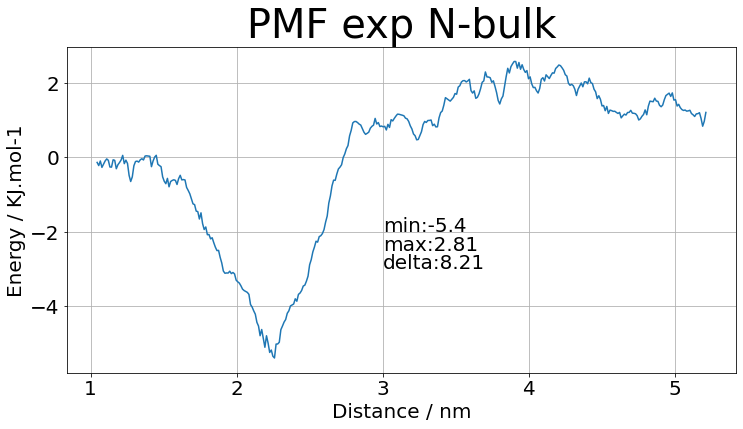

In [195]:
p = df.plot.line(x="x",y="y", grid=True, legend=False,figsize=(12,6))
p.set_title("PMF exp N-bulk", size=40)
p.set_xlabel("Distance / nm", size=20)
p.set_ylabel("Energy / KJ.mol-1", size=20)
p.text(3,-2,'min:'+str(y_min), size=20)
p.text(3,-2.5,'max:'+str(y_max),size=20)
p.text(3,-3,'delta:'+str(delta),size=20)
p.tick_params(labelsize=20)
plt.show()

Salva o plot em arquivo

In [197]:
p.get_figure().savefig("pmfEXP-N-bulk.20200904.png")